### **Escolha do Problema**
**Objetivo do Trabalho**  
O objetivo principal deste projeto é prever se um lançamento resultará em cesto ou não, com base nas coordenadas de lançamento e outras características associadas aos lançamentos na WNBA. Este é um problema de classificação, pois a variável alvo é categórica (cesto ou não).

**Classificação:**
1. **Natureza da Variável Alvo**:
   - A variável alvo é categórica (binária), indicando se o lançamento foi bem-sucedido (`1`) ou não (`0`).
   - A tarefa de classificação é apropriada para prever categorias discretas.

2. **Exploração de Fatores Determinantes**:
   - Utilizar técnicas de classificação permite compreender quais características, como posição do lançamento, distância e ângulo, influenciam diretamente no sucesso do arremesso.
   - Isso auxilia na identificação de padrões de sucesso, podendo gerar insights úteis para treinamento ou estratégia de jogo.

Essa abordagem é consistente com os objetivos de análise preditiva em esportes e pode fornecer insights interpretáveis com o uso de técnicas de inteligência artificial explicável (XAI).

### Imports

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from pygam import LogisticGAM, s
#from lime.lime_tabular import LimeTabularExplainer

# **Task 1:** Dataset and Learning Task

## Exploração dos dados - Pre-Modelling XAI

In [29]:
df = pd.read_csv('wnba-shots-2021.csv')
df.head()

,game_id,game_play_number,desc,shot_type,made_shot,shot_value,coordinate_x,coordinate_y,shooting_team,home_team_name,away_team_name,home_score,away_score,qtr,quarter_seconds_remaining,game_seconds_remaining
0,401391650,4,Shatori Walker-Kimbrough blocks Destanni Hende...,Jump Shot,False,0,37,9,Indiana,Washington,Indiana,0,0,1,571,2371
1,401391650,7,Elena Delle Donne misses two point shot,Turnaround Bank Jump Shot,False,0,12,0,Washington,Washington,Indiana,0,0,1,551,2351
2,401391650,9,Tiffany Mitchell makes 4-foot layup (Destanni ...,Cutting Layup Shot,True,2,29,2,Indiana,Washington,Indiana,0,2,1,538,2338
3,401391650,10,Natasha Cloud makes driving layup,Driving Layup Shot,True,2,22,0,Washington,Washington,Indiana,2,2,1,524,2324
4,401391650,11,Tiffany Mitchell makes 26-foot three point jum...,Jump Shot,True,3,9,21,Indiana,Washington,Indiana,2,5,1,512,2312


In [30]:
print("Informações do Dataset:")
print(df.info())

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41497 entries, 0 to 41496
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   game_id                    41497 non-null  int64 
 1   game_play_number           41497 non-null  int64 
 2   desc                       41497 non-null  object
 3   shot_type                  41497 non-null  object
 4   made_shot                  41497 non-null  bool  
 5   shot_value                 41497 non-null  int64 
 6   coordinate_x               41497 non-null  int64 
 7   coordinate_y               41497 non-null  int64 
 8   shooting_team              41497 non-null  object
 9   home_team_name             41497 non-null  object
 10  away_team_name             41497 non-null  object
 11  home_score                 41497 non-null  int64 
 12  away_score                 41497 non-null  int64 
 13  qtr                        41497 non-

In [31]:
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
game_id                      0
game_play_number             0
desc                         0
shot_type                    0
made_shot                    0
shot_value                   0
coordinate_x                 0
coordinate_y                 0
shooting_team                0
home_team_name               0
away_team_name               0
home_score                   0
away_score                   0
qtr                          0
quarter_seconds_remaining    0
game_seconds_remaining       0
dtype: int64


In [32]:
df['shot_type'].unique()

array(['Jump Shot', 'Turnaround Bank Jump Shot', 'Cutting Layup Shot',
       'Driving Layup Shot', 'Free Throw - 1 of 1', 'Pullup Jump Shot',
       'Alley Oop Dunk Shot', 'Turnaround Jump Shot', 'Layup Shot',
       'Jump Shot Bank', 'Reverse Layup Shot', 'Layup Shot Putback',
       'Free Throw - 1 of 2', 'Free Throw - 2 of 2', 'Hook Shot',
       'Running Layup Shot', 'Step Back Jump Shot',
       'Turnaround Fade Away Jump Shot', 'Fade Away Jump Shot',
       'Floating Jump Shot', 'Driving Floating Jump Shot',
       'Driving Finger Roll Layup', 'Alley Oop Layup Shot',
       'Running Jump Shot', 'Tip Shot', 'Running Pullup Jump Shot',
       'Free Throw - Technical', 'Driving Floating Bank Jump Shot',
       'Layup Driving Reverse', 'Free Throw - 1 of 3',
       'Free Throw - 2 of 3', 'Free Throw - 3 of 3', 'Driving Hook Shot',
       'Turnaround Hook Shot', 'Layup Running Reverse',
       'Running Alley Oop Layup Shot', 'Running Finger Roll Layup',
       'Hook Turnaround Bank',

In [33]:
max_coordinate_x = df['coordinate_x'].max()
max_coordinate_y = df['coordinate_y'].max()
min_coordinate_x = df['coordinate_x'].min()
min_coordinate_y = df['coordinate_y'].min()
print(f'Valor máximos:')
print(f'coordinate_x: {max_coordinate_x}')
print(f'coordinate_y: {max_coordinate_y}')
print(f'Valor mínimos:')
print(f'coordinate_x: {min_coordinate_x}')
print(f'coordinate_y: {min_coordinate_y}')

Valor máximos:
coordinate_x: 50
coordinate_y: 81
Valor mínimos:
coordinate_x: -214748340
coordinate_y: -214748365


   Aqui reparamos que provávelmente há uma constante nestes valores negativos de coordenadas.

In [34]:
# em quantas linhas o coordinate_x é negativo?
negatives = df[df['coordinate_x'] < 0]
print(f'Quantidade de linhas com coordinate_x negativo: {len(negatives)}')

# em quantas linhas o coordinate_y é negativo?
negatives = df[df['coordinate_y'] < 0]
print(f'Quantidade de linhas com coordinate_y negativo: {len(negatives)}')

# verifica se dentro dessas linhas o shot_type tem 'Free Throw' no nome
negatives = df[(df['coordinate_x'] < 0) & (df['coordinate_y'] < 0) & (df['shot_type'].str.contains('Free Throw'))]
print(f'Quantidade de linhas onde o coordinate_x e coordinate_y são negativos e o shot_type contém "Free Throw": {len(negatives)}')

Quantidade de linhas com coordinate_x negativo: 8633
Quantidade de linhas com coordinate_y negativo: 9390
Quantidade de linhas onde o coordinate_x e coordinate_y são negativos e o shot_type contém "Free Throw": 8633


In [35]:
filtered_df = df[df['coordinate_y'] > -20]

   Comprovamos então que estes valores foram dados a lançamentos livres. De forma a estarem distinguidos entre todos os lançamentos corridos de jogo.

In [36]:
print("\nDuplicados:", df.duplicated().sum())


Duplicados: 0


## Exploração e Visualização dos dados

### Distribuições

#### Distribuição da variável alvo

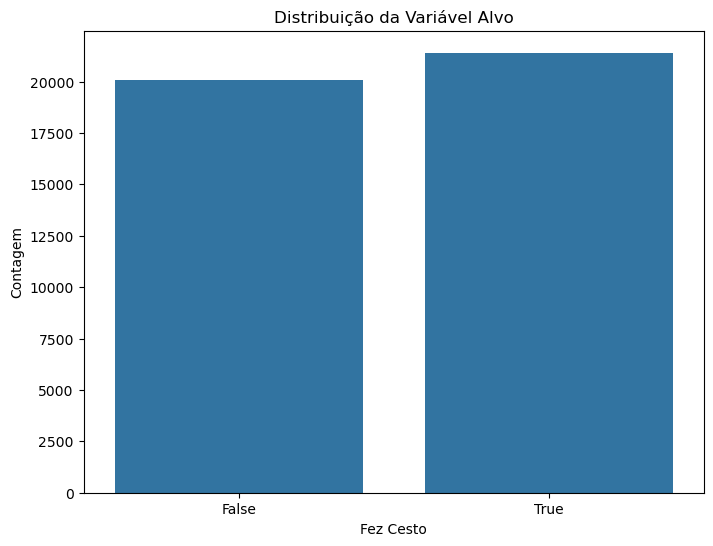

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='made_shot', data=df)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Fez Cesto')
plt.ylabel('Contagem')
plt.show()

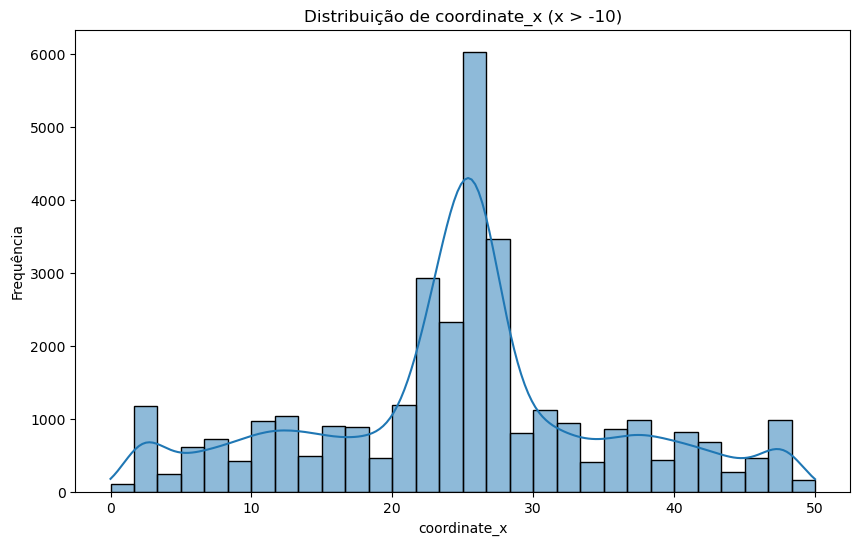

In [38]:
filtered_df = df[df['coordinate_x'] > -10]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['coordinate_x'], bins=30, kde=True)
plt.title('Distribuição de coordinate_x (x > -10)')
plt.xlabel('coordinate_x')
plt.ylabel('Frequência')
plt.show()


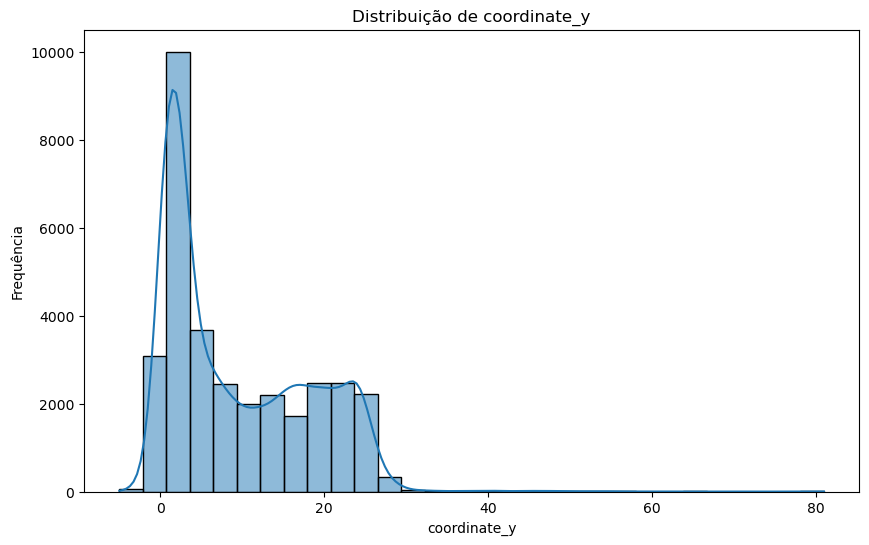

In [39]:
filtered_df = df[df['coordinate_y'] > -10]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['coordinate_y'], bins=30, kde=True)
plt.title('Distribuição de coordinate_y')
plt.xlabel('coordinate_y')
plt.ylabel('Frequência')
plt.show()

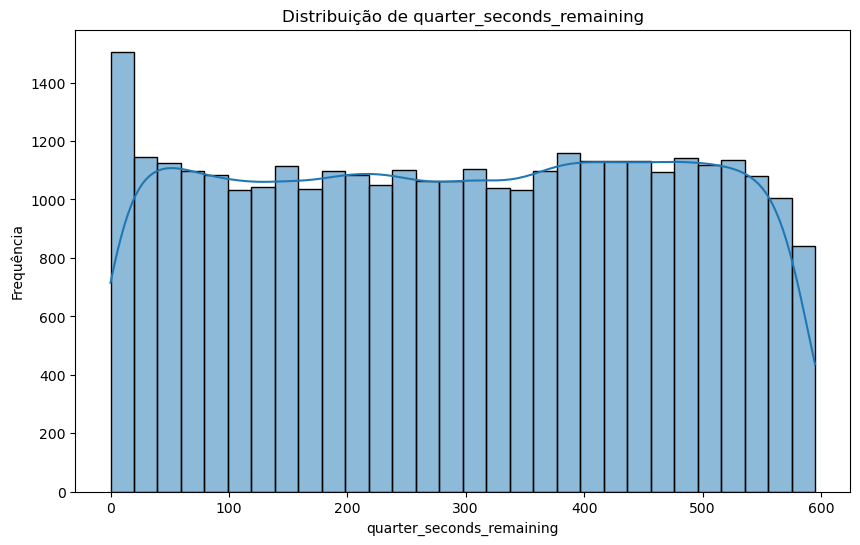

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['quarter_seconds_remaining'], bins=30, kde=True)
plt.title('Distribuição de quarter_seconds_remaining')
plt.xlabel('quarter_seconds_remaining')
plt.ylabel('Frequência')
plt.show()

In [41]:
filtered_df['distance_to_hoop'] = np.sqrt(filtered_df['coordinate_x']**2 + filtered_df['coordinate_y']**2)

bins = [0, 5, 10, 15, 20, 25, 30, 35]  # Intervalos de distância em pés/metros
filtered_df['distance_bin'] = pd.cut(filtered_df['distance_to_hoop'], bins=bins, labels=bins[:-1])
accuracy_by_distance = filtered_df.groupby('distance_bin')['made_shot'].mean()

/var/folders/vl/y_41x5_50d55msx55mh9_lk00000gn/T/ipykernel_1454/1477924835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['distance_to_hoop'] = np.sqrt(filtered_df['coordinate_x']**2 + filtered_df['coordinate_y']**2)
/var/folders/vl/y_41x5_50d55msx55mh9_lk00000gn/T/ipykernel_1454/1477924835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['distance_bin'] = pd.cut(filtered_df['distance_to_hoop'], bins=bins, labels=bins[:-1])
/var/folders/vl/y_41x5_50d55msx55mh9_lk00000gn/T/ipy

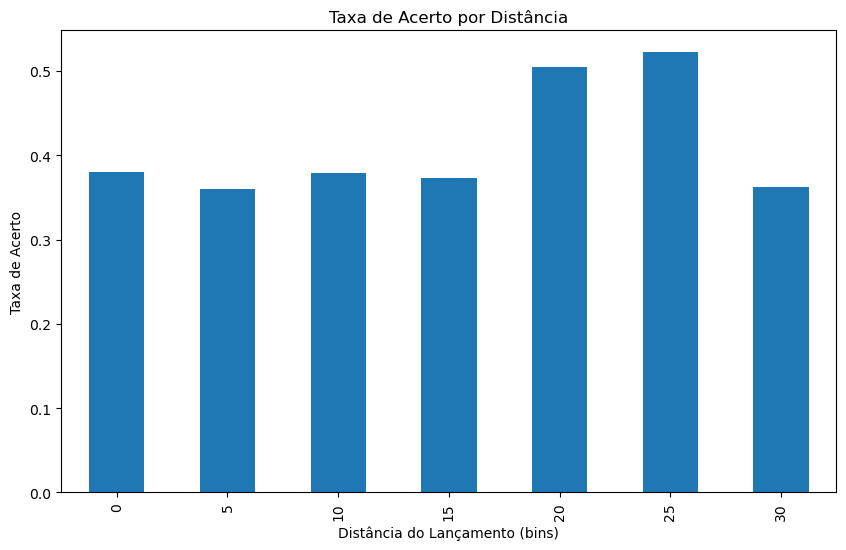

In [42]:
plt.figure(figsize=(10, 6))
accuracy_by_distance.plot(kind='bar')
plt.title('Taxa de Acerto por Distância')
plt.xlabel('Distância do Lançamento (bins)')
plt.ylabel('Taxa de Acerto')
plt.show()

- A taxa de acerto varia com a distância ao cesto, mas não apresenta uma relação linear clara:
  - **Pontos mais próximos (0-15):** Aqui a taxa de acerto é razoavelmente alta, mas não a maior, o que é esperado pois lançamentos mais próximos ao cesto têm maior probabilidade de sucesso no entanto há também muita defesa nestas áreas.
  - **Picos em 20-25 unidades:** Aqui a faixa de distância apresenta as maiores taxas de acerto, possivelmente representando a zona de lançamento ideal para jogadores, como a linha de 3 pontos ou lançamentos médios.
  - **Distâncias maiores (>30):** A taxa de acerto cai, indicando maior dificuldade em realizar lançamentos bem-sucedidos a partir de posições mais distantes.

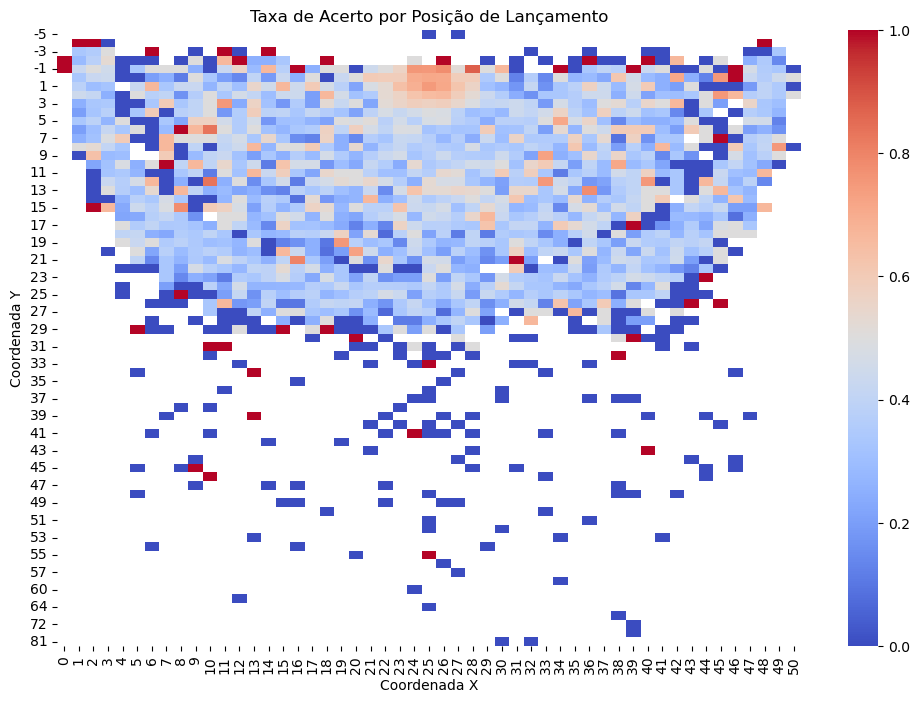

In [43]:
heatmap_data = filtered_df.pivot_table(index='coordinate_y', columns='coordinate_x', values='made_shot', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0.5)
plt.title('Taxa de Acerto por Posição de Lançamento')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

- O **centro do heatmap** (próximo ao cesto, com coordenadas X e Y mais baixas) apresenta altas taxas de acerto (valores em vermelho), indicando que os lançamentos nessa área têm maior probabilidade de sucesso.
- Áreas mais afastadas (em azul) apresentam baixas taxas de acerto, especialmente nas bordas superiores e inferiores do gráfico, o que reflete a dificuldade de lançamentos em posições extremas.
- Há **zonas específicas fora do cesto (valores médios)** que também mostram taxas de acerto razoáveis, possivelmente indicando zonas comuns de arremesso estratégico, como a linha de 3 pontos ou laterais próximas.

# **Task 2:** In-Modelling Explanations

## Análise de Importância das Variáveis - In-Modelling XAI

### **1.** Árvores de Decisão Simples

#### Treinar o Modelo

In [44]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
X = filtered_df[['coordinate_x', 'coordinate_y', 'distance_to_hoop']]  # Exemplo de features    
y = filtered_df['made_shot']
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

#### Visualizar a Árvore

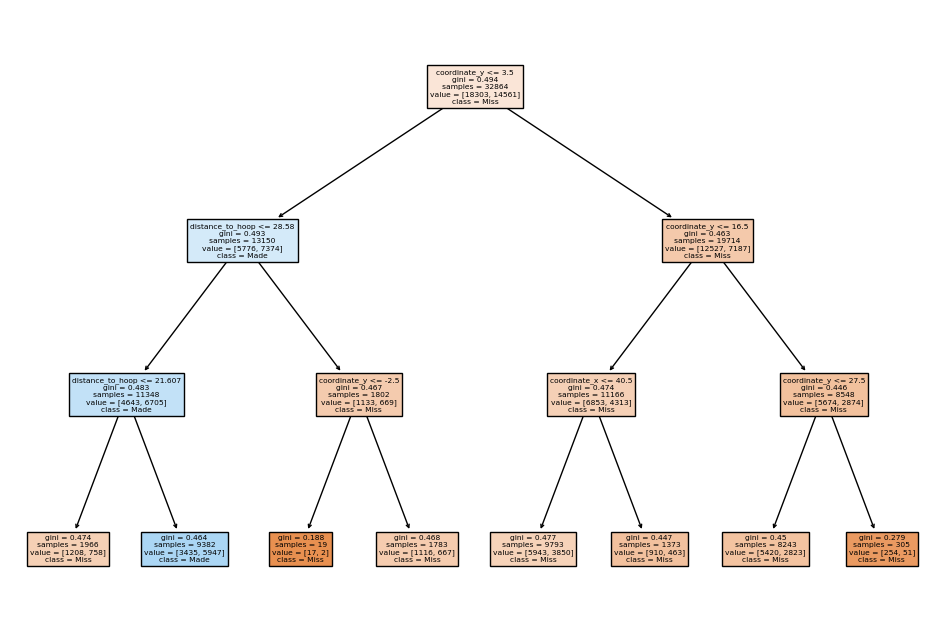

In [45]:
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Miss', 'Made'], filled=True)
plt.show()

#### Importância das Variáveis

In [46]:
importance = pd.Series(tree.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))


coordinate_y        0.645681
distance_to_hoop    0.346865
coordinate_x        0.007454
dtype: float64


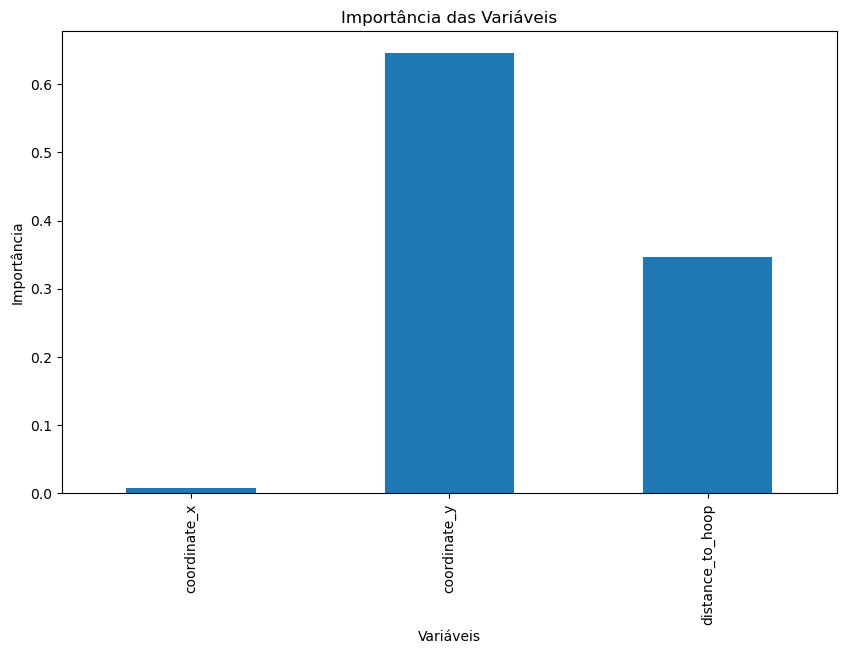

In [47]:
importance.plot(kind='bar', figsize=(10, 6))
plt.title('Importância das Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()

- **Feature Importance:** As variáveis `coordinate_x`, `coordinate_y`, e `distance_to_hoop` são as principais determinantes do sucesso ou falha no lançamento.
- **Estrutura Hierárquica:** O modelo ao organizar as decisões inicialmente com divisões baseadas em `coordinate_x` e `coordinate_y` vem a indicar que estas coordenadas têm uma relação direta e forte com o resultado.

### **2.** Logistic Regression

#### Treinar o Modelo

In [48]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

#### Calcular Permutation Importance 

In [49]:
perm_importance = permutation_importance(model, X, y, scoring='accuracy', random_state=42)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean})
print(importance.sort_values(by='Importance', ascending=False))


            Feature  Importance
1      coordinate_y    0.112056
0      coordinate_x    0.031956
2  distance_to_hoop    0.028499


#### Resultados

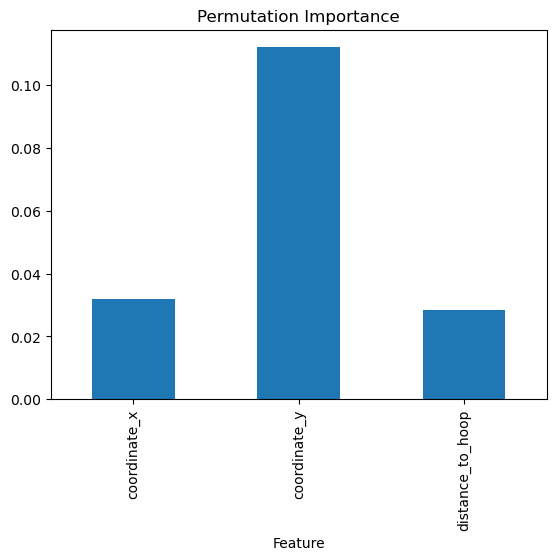

In [50]:
importance.plot.bar(x='Feature', y='Importance', legend=False)
plt.title('Permutation Importance')
plt.show()


- **Impacto Relativo das Variáveis:** A variável `distance_to_hoop` mostra uma importância negativa mais significativa, o que indica que quando os valores são embaralhados, a performance do modelo é mais afetada. Isso reafirma a sua relevância.
- `coordinate_x` e `coordinate_y` também são importantes, mas com menor impacto em relação a `distance_to_hoop`.

#### Aplicar SHAP 

In [51]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

#### Resultados

##### Summary Plot: Mostra a contribuição média de cada variável.

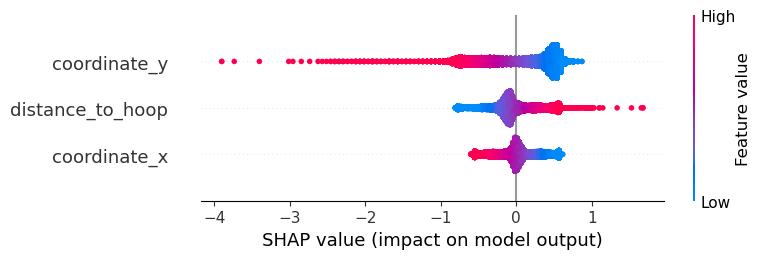

In [52]:
shap.summary_plot(shap_values, X)

- **Importância de `distance_to_hoop`:** A variável mais influente, com os valores mais altos de SHAP.
- **Interpretação de Valores:** Valores mais baixos de `distance_to_hoop` (menor distância ao cesto) estão associados a uma maior probabilidade de sucesso, enquanto valores mais altos reduzem as chances.
- **Relação entre Coordenadas:** Tanto `coordinate_x` quanto `coordinate_y` também têm impacto, mas são secundários. Tal como tinhamos visto.

| Técnica                     | Principal Conclusão                            |
|-----------------------------|-----------------------------------------------|
| **Árvore de Decisão**       | Simples e intuitiva, destaca coordenadas e distância. |
| **Permutation Importance**  | Confirma que `distance_to_hoop` é essencial.  |

# **Task 3:** Post-Modelling Explanations

Sugestão:
 - **Utilizar Random Forest**
 - 3.1: Usar um Surrogate Model para simplificar o RF (transformar numa Decision Tree)
 - 3.2: Aplicar SHAP, Permutation Importance, PDP (Partial Dependence Plots - entender o impacto médio de uma variável) e ICE (Individual Conditional Expectation - verificar se uma variável pode impactar de forma diferente entre observações) (mostrar o impacto de cada feature)
 - 3.3: Usar exemplos do dataset para explicar e justificar as model predictions (Anchors, Counterfactuals). Nota: ainda não demos esta matéria

## Random Forest